In [187]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

In [188]:
train = pd.read_csv('data/application_train.csv')
test = pd.read_csv('data/application_test.csv')

## Data Assessment

In [189]:
train.info(max_cols=130)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

In [190]:
train.shape, test.shape

((307511, 122), (48744, 121))

In [191]:
pd.options.display.max_columns=130

In [192]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [193]:
train.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
256438,396746,0,Cash loans,M,Y,Y,2,180000.0,558000.0,17046.0,558000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.028663,-16561,-2415,-1158.0,-108,8.0,1,1,0,1,1,0,Drivers,4.0,2,2,THURSDAY,16,0,0,0,0,0,0,Self-employed,0.552236,0.742175,0.401407,0.1031,0.0029,0.9771,0.6872,0.0110,0.00,0.2069,0.1667,0.0417,0.0932,0.0841,0.0894,0.0000,0.0014,0.1050,0.0030,0.9772,0.6994,0.0111,0.0000,0.2069,0.1667,0.0417,0.0953,0.0918,0.0932,0.0,0.0015,0.1041,0.0029,0.9771,0.6914,0.0111,0.00,0.2069,0.1667,0.0417,0.0948,0.0855,0.0910,0.0000,0.0014,reg oper account,block of flats,0.0767,"Stone, brick",No,0.0,0.0,0.0,0.0,-2504.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
32632,137821,0,Cash loans,F,N,Y,1,198000.0,835380.0,33129.0,675000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.035792,-16181,-497,-439.0,-4612,NaN,1,1,1,1,1,0,Managers,3.0,2,2,MONDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.683602,0.369962,0.183035,0.0835,0.0446,0.9990,0.9864,NaN,0.00,0.0690,0.2500,NaN,0.0203,NaN,0.0590,NaN,0.0353,0.0851,0.0463,0.9990,0.9869,NaN,0.0000,0.0690,0.2500,NaN,0.0207,NaN,0.0615,NaN,0.0373,0.0843,0.0446,0.9990,0.9866,NaN,0.00,0.0690,0.2500,NaN,0.0206,NaN,0.0601,NaN,0.0360,NaN,block of flats,0.0691,"Stone, brick",No,3.0,1.0,3.0,1.0,-2983.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,8.0,0.0,0.0
203040,335383,0,Cash loans,F,N,Y,0,99000.0,521280.0,20668.5,450000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.028663,-19613,-12725,-8531.0,-3072,NaN,1,1,1,1,1,0,Managers,1.0,2,2,SUNDAY,11,0,0,0,0,0,0,Military,NaN,0.780025,0.819318,NaN,NaN,0.9801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2221,NaN,NaN,NaN,NaN,0.9801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2314,NaN,NaN,NaN,NaN,0.9801,NaN,NaN,NaN,

In [194]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [195]:
# Number of values for each feature
train.nunique().sort_values(ascending=False)

SK_ID_CURR                    307511
EXT_SOURCE_2                  119831
EXT_SOURCE_1                  114584
DAYS_BIRTH                     17460
DAYS_REGISTRATION              15688
AMT_ANNUITY                    13672
DAYS_EMPLOYED                  12574
DAYS_ID_PUBLISH                 6168
AMT_CREDIT                      5603
LIVINGAREA_MODE                 5301
LIVINGAREA_MEDI                 5281
LIVINGAREA_AVG                  5199
TOTALAREA_MODE                  5116
BASEMENTAREA_MODE               3841
BASEMENTAREA_AVG                3780
DAYS_LAST_PHONE_CHANGE          3773
BASEMENTAREA_MEDI               3772
LANDAREA_MODE                   3563
LANDAREA_MEDI                   3560
LANDAREA_AVG                    3527
NONLIVINGAREA_MODE              3327
NONLIVINGAREA_MEDI              3323
NONLIVINGAREA_AVG               3290
COMMONAREA_MEDI                 3202
COMMONAREA_AVG                  3181
COMMONAREA_MODE                 3128
AMT_INCOME_TOTAL                2548
A

### Target variable

1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample

0 - all other cases

In [196]:
# Total number of records
n_records = train.shape[0]

# Number of clients with payment difficulties
target_late = len(train[train.TARGET == 1])

# Number of clients other cases (non payment difficulties)
target_good = len(train[train.TARGET == 0])

# Percentage of individuals without payment difficulty
good_percent = round(target_good/n_records*100, ndigits=2)

# Print the results
print("Total number of records: {}".format(n_records))
print("Clients with payment difficulties: {}".format(target_late))
print("Clients without payment difficulties: {}".format(target_good))
print("Percentage of individuals without payment difficulty: {}%".format(good_percent))

Total number of records: 307511
Clients with payment difficulties: 24825
Clients without payment difficulties: 282686
Percentage of individuals without payment difficulty: 91.93%


**We see that the target variable is highly imbalanced.**

That means that accuracy is not a good metric for this dataset. I will be using **ROC AUC** metric (which is how this dataset is evaluated at kaggle). Other metrics we could use is the **F-beta** score.

In [197]:
target_good + target_late == len(train.TARGET)

True

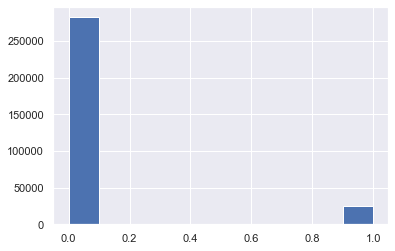

In [198]:
train.TARGET.hist();

## Missing values

In [199]:
# 67 columns have missing values in the train test
len(train.isnull().sum()[train.isnull().sum()>0])

67

In [200]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing_values', 1 : 'Missing_percentage'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    'Missing_percentage', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

#https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

In [201]:
pd.options.display.max_rows = 70

### Columns missing values

#### Train set

In [202]:
train_missing_values_col = missing_values_table(train)
train_missing_values_col

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing_values,Missing_percentage
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


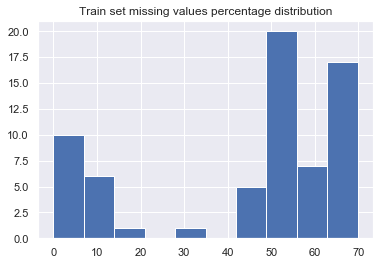

In [203]:
train_missing_values_col['Missing_percentage'].hist()
plt.title('Train set missing values percentage distribution');

#### Test set

In [204]:
test_missing_values_col = missing_values_table(test)
test_missing_values_col

Your selected dataframe has 121 columns.
There are 64 columns that have missing values.


,Missing_values,Missing_percentage
COMMONAREA_MODE,33495,68.7
COMMONAREA_MEDI,33495,68.7
COMMONAREA_AVG,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_MEDI,32780,67.2
LIVINGAPARTMENTS_AVG,32780,67.2


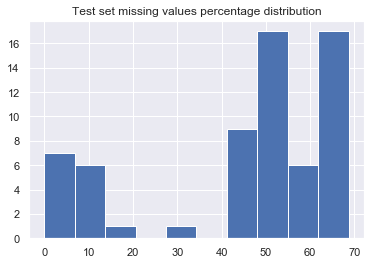

In [205]:
test_missing_values_col['Missing_percentage'].hist()
plt.title('Test set missing values percentage distribution');

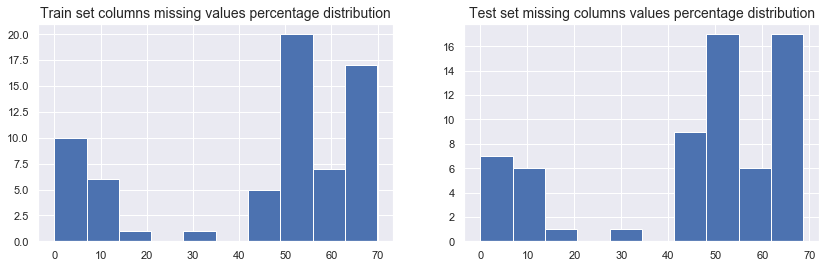

In [206]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
train_missing_values_col['Missing_percentage'].hist()
plt.title('Train set columns missing values percentage distribution', fontdict={'fontsize': 14})
plt.subplot(1,2,2)
test_missing_values_col['Missing_percentage'].hist()
plt.title('Test set missing columns values percentage distribution', fontdict={'fontsize': 14});

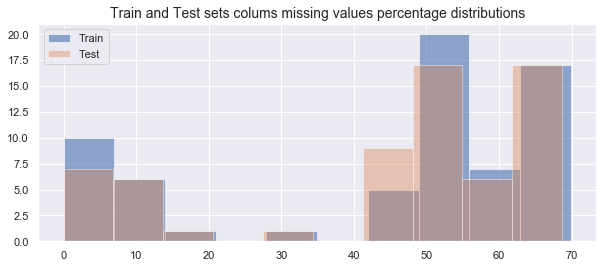

In [207]:
plt.figure(figsize=(10,4))
train_missing_values_col['Missing_percentage'].hist(alpha=0.6)
test_missing_values_col['Missing_percentage'].hist(alpha=0.4)
plt.title('Train and Test sets colums missing values percentage distributions', fontdict={'fontsize': 14})
plt.legend(['Train', 'Test'], loc='upper left');

We see that some columns have many missing values. We also see that the distribution of missing values is similar for the train and test sets.

### Rows missing values

#### Train set missing values

In [208]:
def missing_values_rows(df):
    # Total missing values
    mis_val = df.isnull().sum(axis=1)

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / train.shape[1]

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing_values', 1 : 'Missing_percentage'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    'Missing_percentage', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns. \n"   
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " rows that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [209]:
train_missing_values_row = missing_values_rows(train)
train_missing_values_row

Your selected dataframe has 307511 rows and 122 columns. 
There are 298909 rows that have missing values.


,Missing_values,Missing_percentage
69707,61,50.0
269492,61,50.0
269786,61,50.0
185713,61,50.0
133770,61,50.0
244833,61,50.0
116937,61,50.0
150206,61,50.0
197736,61,50.0
36899,60,49.2


In [210]:
test_missing_values_row = missing_values_rows(test)
test_missing_values_row

Your selected dataframe has 48744 rows and 121 columns. 
There are 47005 rows that have missing values.


,Missing_values,Missing_percentage
45915,61,50.0
11311,58,47.5
9149,58,47.5
46262,58,47.5
43634,58,47.5
3220,58,47.5
23933,58,47.5
8612,58,47.5
8354,57,46.7
4811,57,46.7


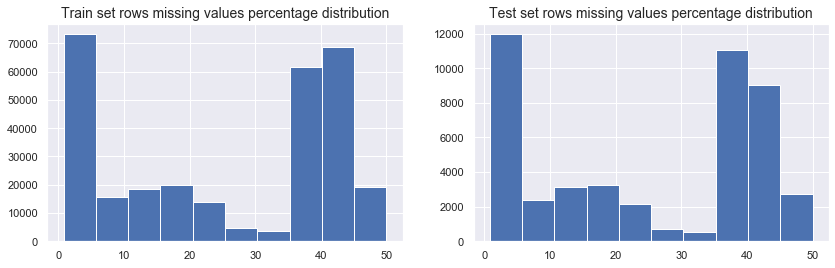

In [211]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
train_missing_values_row['Missing_percentage'].hist()
plt.title('Train set rows missing values percentage distribution', fontdict={'fontsize': 14})
plt.subplot(1,2,2)
test_missing_values_row['Missing_percentage'].hist()
plt.title('Test set rows missing values percentage distribution', fontdict={'fontsize': 14});

### Create clean dataset

In [212]:
train_clean = train.copy()
test_clean = test.copy()

### Column types

In [213]:
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [214]:
test.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64

### Object column features

In [215]:
# number of unique classes for categorical features
train.select_dtypes('object').nunique().sort_values(ascending=False)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
WALLSMATERIAL_MODE             7
WEEKDAY_APPR_PROCESS_START     7
NAME_TYPE_SUITE                7
NAME_HOUSING_TYPE              6
NAME_FAMILY_STATUS             6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
CODE_GENDER                    3
EMERGENCYSTATE_MODE            2
FLAG_OWN_REALTY                2
FLAG_OWN_CAR                   2
NAME_CONTRACT_TYPE             2
dtype: int64

In [216]:
# Unique values for each categorical feature
for i in (train.select_dtypes('object').nunique().sort_values(ascending=False)).index:
    print(i, '\n', train[i].unique(), '\n')

ORGANIZATION_TYPE 
 ['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construction' 'Housing' 'Kindergarten'
 'Trade: type 7' 'Industry: type 11' 'Military' 'Services'
 'Security Ministries' 'Transport: type 4' 'Industry: type 1' 'Emergency'
 'Security' 'Trade: type 2' 'University' 'Transport: type 3' 'Police'
 'Business Entity Type 1' 'Postal' 'Industry: type 4' 'Agriculture'
 'Restaurant' 'Culture' 'Hotel' 'Industry: type 7' 'Trade: type 3'
 'Industry: type 3' 'Bank' 'Industry: type 9' 'Insurance' 'Trade: type 6'
 'Industry: type 2' 'Transport: type 1' 'Industry: type 12' 'Mobile'
 'Trade: type 1' 'Industry: type 5' 'Industry: type 10' 'Legal Services'
 'Advertising' 'Trade: type 5' 'Cleaning' 'Industry: type 13'
 'Trade: type 4' 'Telecom' 'Industry: type 8' 'Realtor' 'Industry: type 6'] 

OCCUPATION_TYPE 
 ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'S

I will later create dummy variables for the categorical features.

In [217]:
# the following categorical features have missing values
missing_values_table(train_clean[train_clean.select_dtypes('object').nunique().index])

Your selected dataframe has 16 columns.
There are 6 columns that have missing values.


,Missing_values,Missing_percentage
FONDKAPREMONT_MODE,210295,68.4
WALLSMATERIAL_MODE,156341,50.8
HOUSETYPE_MODE,154297,50.2
EMERGENCYSTATE_MODE,145755,47.4
OCCUPATION_TYPE,96391,31.3
NAME_TYPE_SUITE,1292,0.4


There are many missing values in some features. Since I don't know the importance of them I will try to avoid removing columns and rows. There are algorithms like XGBoost that work well with missing values. I could also impute the most frequent value (mode), but that does not sound as a good practice, i.e. to randomly assign the mode; also there are many missing values so that could be misleading and create bias.

## Handle missing values

### Categorical features

I will create a new feature called 'missing' to fill in the NaN values.

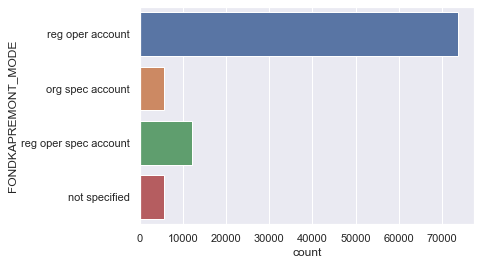

In [218]:
sns.countplot(y=train_clean['FONDKAPREMONT_MODE']);

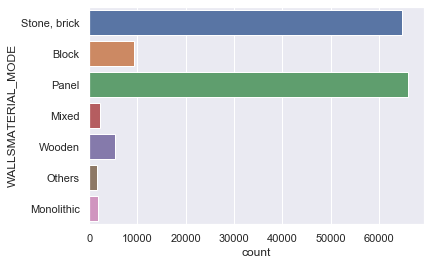

In [219]:
sns.countplot(y=train_clean['WALLSMATERIAL_MODE']);

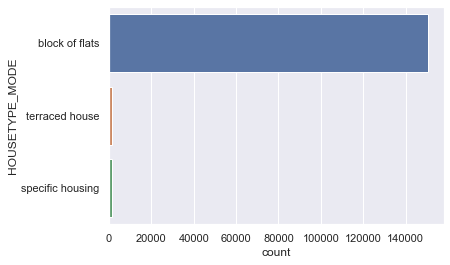

In [220]:
sns.countplot(y=train_clean['HOUSETYPE_MODE']);

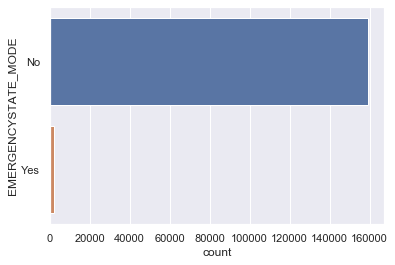

In [221]:
sns.countplot(y=train_clean['EMERGENCYSTATE_MODE']);

In [222]:
train_clean['EMERGENCYSTATE_MODE'].value_counts()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

In [223]:
2328/(2328+159428)

0.014392047281090036

Countplot of emergency state mode and target variable.

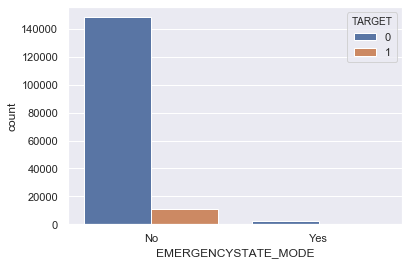

In [224]:
sns.countplot(x='EMERGENCYSTATE_MODE', hue='TARGET', data=train_clean);

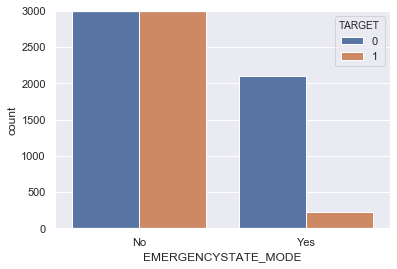

In [225]:
# Zoom-in
sns.countplot(x='EMERGENCYSTATE_MODE', hue='TARGET', data=train_clean)
plt.ylim(0,3000);

It looks like the distributions between No and Yes and the Target variable are quite similar. Thus, imputing the mode, which is 'No', should not really affect the analysis.

However, I want also to check the distribution of the missing values in relation with the target as well.

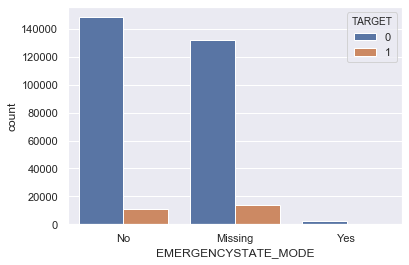

In [226]:
sns.countplot(x=train_clean['EMERGENCYSTATE_MODE'].fillna('Missing'), hue=train_clean['TARGET']);

We see the the distribution is similar between Missing and No, but not exactly. Although I could impute the mode without really causing an issue in the analysis, I will replace NaN with Missing as the rest of the categorical features.

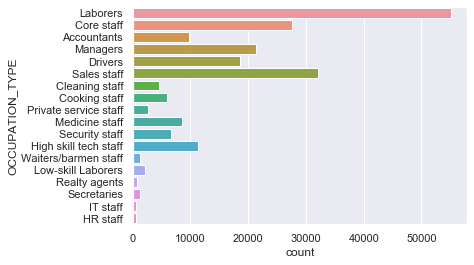

In [227]:
sns.countplot(y=train_clean['OCCUPATION_TYPE']);

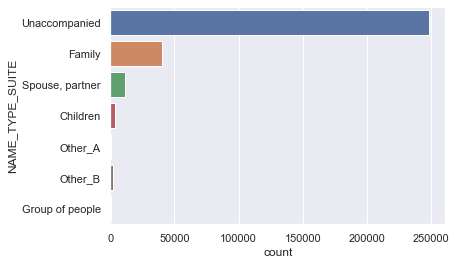

In [228]:
sns.countplot(y=train_clean['NAME_TYPE_SUITE']);

There are about 1200 missing values for the NAME_TYPE_SUITE or 0.4% of the dataset. I could also drop these records.

#### Replace NaN values with Missing

In [229]:
train_clean['FONDKAPREMONT_MODE'].fillna('Missing', inplace=True)
train_clean['WALLSMATERIAL_MODE'].fillna('Missing', inplace=True)
train_clean['HOUSETYPE_MODE'].fillna('Missing', inplace=True)
train_clean['EMERGENCYSTATE_MODE'].fillna('Missing', inplace=True)
train_clean['OCCUPATION_TYPE'].fillna('Missing', inplace=True)
train_clean['NAME_TYPE_SUITE'].fillna('Missing', inplace=True)

In [230]:
# Categorical missing values have now been treated
missing_values_table(train_clean[train_clean.select_dtypes('object').nunique().index])

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing_values,Missing_percentage


#### Test set

Perform the same encoding to the test set.

In [231]:
missing_values_table(test_clean[test_clean.select_dtypes('object').nunique().index])

Your selected dataframe has 16 columns.
There are 6 columns that have missing values.


,Missing_values,Missing_percentage
FONDKAPREMONT_MODE,32797,67.3
WALLSMATERIAL_MODE,23893,49.0
HOUSETYPE_MODE,23619,48.5
EMERGENCYSTATE_MODE,22209,45.6
OCCUPATION_TYPE,15605,32.0
NAME_TYPE_SUITE,911,1.9


In [232]:
test_clean['FONDKAPREMONT_MODE'].fillna('Missing', inplace=True)
test_clean['WALLSMATERIAL_MODE'].fillna('Missing', inplace=True)
test_clean['HOUSETYPE_MODE'].fillna('Missing', inplace=True)
test_clean['EMERGENCYSTATE_MODE'].fillna('Missing', inplace=True)
test_clean['OCCUPATION_TYPE'].fillna('Missing', inplace=True)
test_clean['NAME_TYPE_SUITE'].fillna('Missing', inplace=True)

In [233]:
missing_values_table(test_clean[test_clean.select_dtypes('object').nunique().index])

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing_values,Missing_percentage


### Numerical Features

In [234]:
missing_values_table(train_clean.select_dtypes(include=np.number)).head(10)

Your selected dataframe has 106 columns.
There are 61 columns that have missing values.


,Missing_values,Missing_percentage
COMMONAREA_MODE,214865,69.9
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
FLOORSMIN_MEDI,208642,67.8


#### ...

In [235]:
train_clean.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

#### Number of children

In [236]:
# Here we see some cases with families with more than 10 children up to 19.
# Might be the case that 2 families have 19 children. I will leave it as it is.
train_clean.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

#### Age

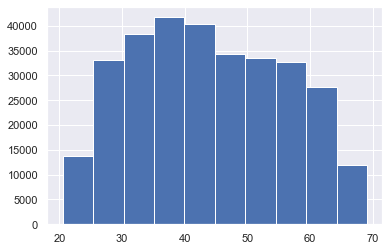

In [237]:
# Age in years looks correct - no outliers
((train_clean.DAYS_BIRTH *(-1))/365).hist();

#### Years employed

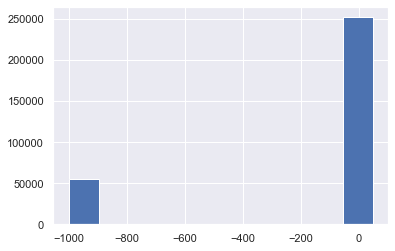

In [238]:
# Something is not right in years of employment
(train_clean.DAYS_EMPLOYED * (-1) / 365).hist();

In [239]:
((train_clean.DAYS_EMPLOYED * (-1) / 365) < -800).sum()

55374

It looks like more than 55,000 values are above 800 years of employment.

Let's check the target variable for these erroneous cases:

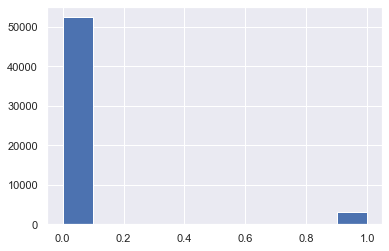

In [240]:
train_clean[((train_clean.DAYS_EMPLOYED * (-1) / 365) < -800)].TARGET.hist();

In [241]:
# Percentage of defaults for erroneous cases is 5.4%
err_days_employed = train_clean[((train_clean.DAYS_EMPLOYED * (-1) / 365) < -800)]
round((err_days_employed.TARGET==1).sum()/len(err_days_employed.TARGET)*100, 2)

5.4

Target variable for the rest of the cases:

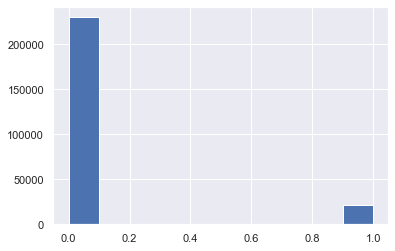

In [242]:
train_clean[((train_clean.DAYS_EMPLOYED * (-1) / 365) > -800)].TARGET.hist();

In [243]:
# Percentage of defaults for rest of cases cases is 8.66%
ok_days_employed = train_clean[((train_clean.DAYS_EMPLOYED * (-1) / 365) > -800)]
round((ok_days_employed.TARGET==1).sum()/len(ok_days_employed.TARGET)*100, 2)

8.66

It looks like the erroneous cases for days of employment default in a smaller percentage compared to the correct records.

I will replace the erroneous values with null.

In [245]:
train_clean.loc[err_days_employed.index, 'DAYS_EMPLOYED'] = np.nan

In [246]:
train_clean['DAYS_EMPLOYED'].isnull().sum()

55374

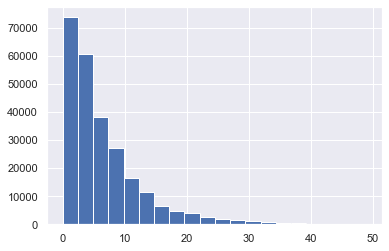

In [249]:
(train_clean['DAYS_EMPLOYED'] * (-1) / 365).hist(bins=20);

#### Car age

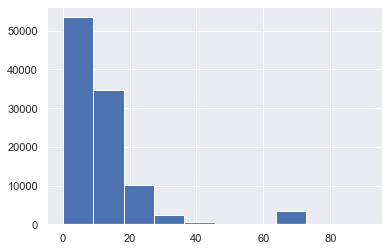

In [252]:
train_clean.OWN_CAR_AGE.hist();

In [254]:
(train_clean.OWN_CAR_AGE > 50).sum()

3361

Car age beoyond 50 years does not really look correct. Unless the car is an old model with high value. Let's check the target variable.

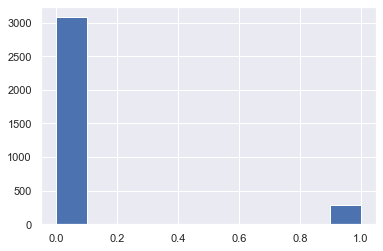

In [262]:
train_clean[train_clean.OWN_CAR_AGE>50].TARGET.hist();

In [263]:
# Percentage of defaults for likely erroneous cases is 8.36%
err_car_age = train_clean[(train_clean.OWN_CAR_AGE > 50)]
round((err_car_age.TARGET==1).sum()/len(err_car_age.TARGET)*100, 2)

8.36

In [264]:
# Percentage of defaults for normal cases is 7.21%
ok_car_age = train_clean[(train_clean.OWN_CAR_AGE < 50)]
round((ok_car_age.TARGET==1).sum()/len(ok_car_age.TARGET)*100, 2)

7.21

Not really a big difference in defaults. For the cars above 50 years old the default is a bit higher than the rest cases. There are already many missing values for this feature. I will replace the car ages beyond 50 years old as missing as well.

In [266]:
train_clean.loc[err_car_age.index, 'OWN_CAR_AGE'] = np.nan

In [269]:
(train_clean.OWN_CAR_AGE > 50).sum()

0